In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
cat4 = cv2.imread('F:/datasets/CATS_DOGS/train/CAT/4.jpg')

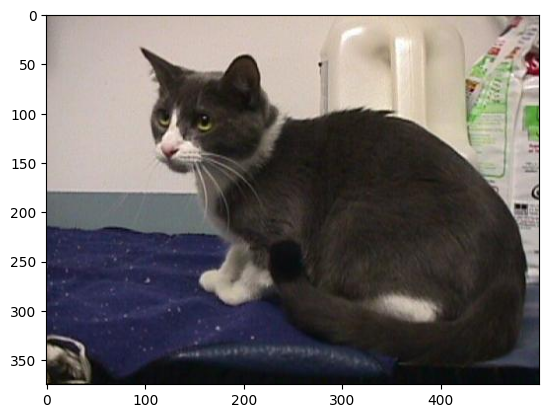

In [3]:
# images have different sizes, 3 color channels
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

In [5]:
# we are going to augument the images to get more data
from keras.preprocessing.image import ImageDataGenerator

In [6]:
image_gen = ImageDataGenerator( rotation_range=30, # rotate the image 30 degrees
                                width_shift_range=0.1, # Shift the pic width by a max of 10%
                                height_shift_range=0.1, # Shift the pic height by a max of 10%
                                rescale=1/255, # Rescale the image by normalzing it.
                                shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                                zoom_range=0.2, # Zoom in by 20% max
                                horizontal_flip=True, # Allow horizontal flipping
                                fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                                )

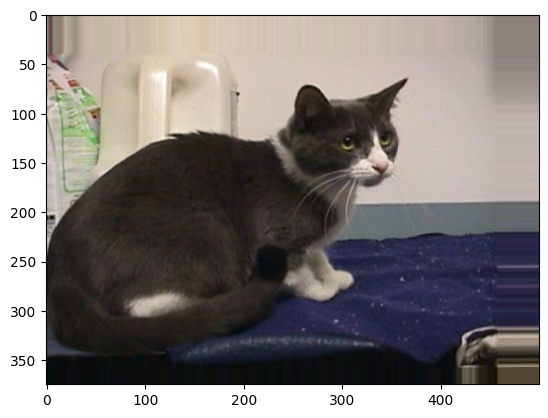

In [19]:
# lets see how the image looks like after augumentation
plt.imshow(image_gen.random_transform(cat4))

In [20]:
image_gen.flow_from_directory('F:/datasets/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [21]:
# lets build the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [36]:
input_shape = (150,150,3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])   

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [38]:
# lets train the model
batch_size = 16

# this is a much larger dataset and the model will take longer to train
train_image_gen = image_gen.flow_from_directory('F:/datasets/CATS_DOGS/train',
                                                target_size=input_shape[:2], # all images will be resized to 150x150
                                                batch_size=batch_size,
                                                class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

Found 18743 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory('F:/datasets/CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary') 

Found 6251 images belonging to 2 classes.


In [40]:
# class indices
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [41]:
results = model.fit_generator(train_image_gen,
                                epochs=300,
                                steps_per_epoch=150, # how many batches to run per epoch = 150*16 = 2400 images
                                validation_data=test_image_gen,
                                validation_steps=12) # 12*16 = 192 images

Epoch 1/300


C:\Users\Tinho\AppData\Local\Temp\ipykernel_10856\2092742357.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,


150/150 [==============================] - 48s 310ms/step - loss: 0.6960 - accuracy: 0.4931 - val_loss: 0.6959 - val_accuracy: 0.4323
Epoch 2/300
150/150 [==============================] - 45s 301ms/step - loss: 0.6913 - accuracy: 0.5321 - val_loss: 0.6741 - val_accuracy: 0.6615
Epoch 3/300
150/150 [==============================] - 44s 296ms/step - loss: 0.6742 - accuracy: 0.5796 - val_loss: 0.6698 - val_accuracy: 0.5469
Epoch 4/300
150/150 [==============================] - 44s 295ms/step - loss: 0.6673 - accuracy: 0.5962 - val_loss: 0.6682 - val_accuracy: 0.6042
Epoch 5/300
 14/150 [=>............................] - ETA: 36s - loss: 0.6764 - accuracy: 0.5536

c:\Users\Tinho\anaconda3\envs\gpu-env\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 [==============================] - 44s 291ms/step - loss: 0.6894 - accuracy: 0.5358 - val_loss: 0.6297 - val_accuracy: 0.6354
Epoch 6/300
150/150 [==============================] - 43s 287ms/step - loss: 0.6687 - accuracy: 0.6079 - val_loss: 0.6628 - val_accuracy: 0.5885
Epoch 7/300
150/150 [==============================] - 43s 286ms/step - loss: 0.6476 - accuracy: 0.6212 - val_loss: 0.6795 - val_accuracy: 0.5938
Epoch 8/300
150/150 [==============================] - 43s 287ms/step - loss: 0.6443 - accuracy: 0.6308 - val_loss: 0.6027 - val_accuracy: 0.6875
Epoch 9/300
150/150 [==============================] - 43s 285ms/step - loss: 0.6426 - accuracy: 0.6454 - val_loss: 0.6141 - val_accuracy: 0.6562
Epoch 10/300
150/150 [==============================] - 42s 283ms/step - loss: 0.6396 - accuracy: 0.6513 - val_loss: 0.5730 - val_accuracy: 0.7448
Epoch 11/300
150/150 [==============================] - 42s 281ms/step - loss: 0.6113 - accuracy: 0.6700 - val_loss: 0.6191 - val_accur

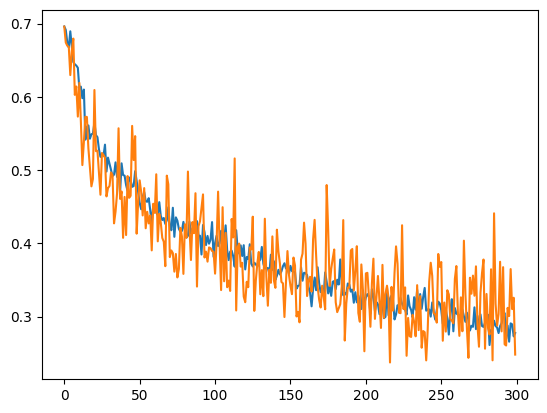

In [42]:
# lets see how the model performed

# plot test loss vs training loss in the same plot
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

In [43]:
# predictin on new images
dog_file = 'F:/datasets/CATS_DOGS/test/DOG/10005.jpg'

from keras.preprocessing import image

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

In [44]:
dog_img.shape

(150, 150, 3)

In [45]:
dog_img[:4,:4,:] # first 4 rows and columns of all 3 color channels

array([[[35., 37., 24.],
        [40., 42., 29.],
        [56., 58., 47.],
        [54., 56., 45.]],

       [[29., 29., 19.],
        [30., 30., 20.],
        [38., 38., 28.],
        [29., 29., 21.]],

       [[18., 13.,  7.],
        [20., 15., 11.],
        [20., 15., 11.],
        [16., 11.,  7.]],

       [[15., 10.,  6.],
        [14.,  9.,  5.],
        [15., 10.,  6.],
        [17., 12.,  8.]]], dtype=float32)

In [32]:
import numpy as np

In [46]:
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [47]:
dog_img = dog_img/255 # normalize the image
model.predict(dog_img) # predict the class, closer to 1 means dog, closer to 0 means cat

1/1 [==============================] - 0s 76ms/step


array([[0.99841785]], dtype=float32)

In [48]:
# evaluate the model
model.metrics_names
model.evaluate_generator(test_image_gen) # loss and accuracy



C:\Users\Tinho\AppData\Local\Temp\ipykernel_10856\4074988206.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.2763387858867645, 0.8856183290481567]

In [50]:
# evaluate the model, F1 score, confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
predictions = model.predict_generator(test_image_gen)
predictions

C:\Users\Tinho\AppData\Local\Temp\ipykernel_10856\583901183.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_image_gen)


array([[8.7859416e-03],
       [1.2208909e-02],
       [1.2767198e-04],
       ...,
       [1.3073070e-01],
       [3.3734951e-02],
       [5.0669068e-01]], dtype=float32)

In [ ]:
predictions = predictions > 0.5
predictions

In [57]:
preditions = [1 if x==True else 0 for x in predictions]
preditions
actual = test_image_gen.classes
actual

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
# confusion matrix
print(confusion_matrix(actual,predictions))


[[1509 1617]
 [1480 1645]]


In [59]:
# f1 score
print(classification_report(actual,predictions))



              precision    recall  f1-score   support

           0       0.50      0.48      0.49      3126
           1       0.50      0.53      0.52      3125

    accuracy                           0.50      6251
   macro avg       0.50      0.50      0.50      6251
weighted avg       0.50      0.50      0.50      6251



In [ ]:
# f1 score is not good enough. perhaps a more complex model will do better or run for more epoch to see if error can be reduced and than increase the complexity of the model